<a href="https://colab.research.google.com/github/ChuksJoy/Python-Data-Analysis-Projects/blob/main/Statistical_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BIVARIATE ANALYSIS

In [2]:
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.age.count()

1338

In [ ]:
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [ ]:
# count unique value using the f print method
print(f'age: {df.age.nunique()}')
print(f'sex: {df.sex.nunique()}')
print(f'bmi: {df.bmi.nunique()}')
print(f'children: {df.children.nunique()}')
print(f'smoker: {df.smoker.nunique()}')
print(f'region: {df.region.nunique()}')
print(f'charges: {df.charges.nunique()}')

age: 47
sex: 2
bmi: 548
children: 6
smoker: 2
region: 4
charges: 1337


In [ ]:
# or simply use the nunique function
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
# checking to see if the datatype of a column is a specific data type or not using the f-print function

print(f'age:{pd.api.types.is_numeric_dtype(df.age)}')

age:True


In [ ]:
import numpy as np

In [ ]:
# checking the stats of charges 

print(df.charges.min())
print(df.charges.max())
print(df.charges.quantile(.25))
print(df.charges.quantile(.50))
print(df.charges.quantile(.75))

print(df.charges.mean())
print(df.charges.median())
print(df.charges.mode().values[0])

# ps: mode is different from the rest, it returns the most common value or count of values for all the unique values in the list, so mode looks at the unique 
# values and looks at the number of times it occurs and sorts it by the greatest to the least, so to get the mode alone, use .values()

1121.8739
63770.42801
4740.28715
9382.033
16639.912515
13270.422265141257
9382.033
1639.5631


In [ ]:
# finding the standard dev of charges in pandas and numpy
#note: Pandas assumes a sample by default and finds its std, while numpy assumes a population and to adjust numpy to do the sample, we use ddof = 1 as the parameter
df.charges.std()

12110.011236694001

In [ ]:
np.std(df.charges, ddof = 1)

12110.011236694001

In [ ]:
#import a common stats package scipy
from scipy.stats import kurtosis, skew

print(skew(df.charges, bias=False))
print(kurtosis(df.charges, bias=False))

1.5158796580240383
1.6062986532967916


In [ ]:
print(df.charges.skew())
print(df.charges.kurt())

1.5158796580240388
1.6062986532967907


Bivariate Num/Num Analyze


In [ ]:
import numpy as np

# create a list

height = [60,62, 65,68,70,74]
weight = [140, 138, 150, 166, 190, 250]

np.corrcoef(height, weight)[0][1]

0.9298974521408027

In [ ]:
import pandas as pd

df = pd.read_csv('http://www.ishelp.info/data/insurance.csv')
df.corr() #correlation between varibles in our table

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
df.charges.corr(df.bmi) # correlation between charges and bmi

0.19834096883362895

In [ ]:
from scipy import stats

corr = stats.pearsonr(df.charges, df.age)
corr #gives you the correlation and its p-value




(0.2990081933306476, 4.8866933317203816e-29)

In [ ]:
#rounding the output by seperate the result equal to 2 variables

r, p = stats.pearsonr(df.charges, df.age)
print(round(r, 4))
print(round(p, 29))

# p turned to zero because the p-value is so small, so we round to 29

0.299
5.0000000000000004e-29


In [ ]:
#making a dataframe for the output

corr_df = pd.DataFrame(column = ['r', 'p'])

for col in df:
  r, p = stats.pearsonr(df.charges, df[col])
  corr_df.loc[col] = [round(r, 3), round(p, 3)]

corr_df
#the output was an error because a column we were trying to calculate is non-numerical, so we want it to ignore
#using the if statement

TypeError: ignored

In [ ]:
corr_df = pd.DataFrame(columns = ['r', 'p'])

for col in df:
  print(col)
  if pd.api.types.is_numeric_dtype(col):
    r, p = stats.pearsonr(df.charges, df[col])
    corr_df.loc[col] = [round(r, 3), round(p, 3)]

corr_df

'''it prints out the column names, because the col is a string, so for the column to work
will need to pass in the entire column of data and not just the name of the col by adding df to the datatype'''

age
sex
bmi
children
smoker
region
charges


,r,p


In [ ]:
corr_df = pd.DataFrame(columns = ['r', 'p'])

for col in df:
  print(col)
  if pd.api.types.is_numeric_dtype(df[col]):
    r, p = stats.pearsonr(df.charges, df[col])
    corr_df.loc[col] = [round(r, 3), round(p, 3)]

corr_df

age
sex
bmi
children
smoker
region
charges


,r,p
age,0.299,0.000
bmi,0.198,0.000
children,0.068,0.013
charges,1.000,0.000


In [ ]:
# we dont need the correlation of charges with itself, so we add that to the if statement

corr_df = pd.DataFrame(columns = ['r', 'p'])

for col in df:
  print(col)
  if pd.api.types.is_numeric_dtype(df[col]) and col != 'charges':
    r, p = stats.pearsonr(df.charges, df[col])
    corr_df.loc[col] = [round(r, 3), round(p, 3)]

corr_df

age
sex
bmi
children
smoker
region
charges


,r,p
age,0.299,0.000
bmi,0.198,0.000
children,0.068,0.013


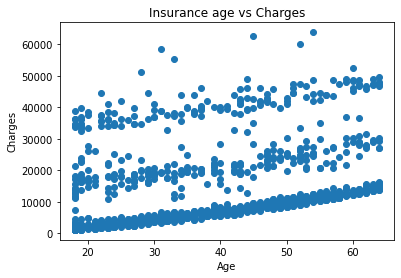

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.age, df.charges)
plt.title('Insurance age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [ ]:
# create two datasets and put both of them on the same chart (smokers and nonsmoker)

df_smoker = df[df['smoker'] == 'yes']
df_nonsmoker = df[df['smoker'] == 'no']

df_smoker



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


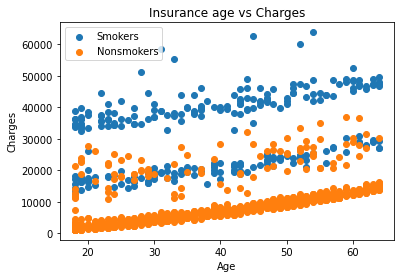

In [ ]:
# create two scatter plots and put them on the same graph
plt.scatter(df_smoker.age, df_smoker.charges, label = 'Smokers')
plt.scatter(df_nonsmoker.age, df_nonsmoker.charges, label = 'Nonsmokers')
plt.title('Insurance age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

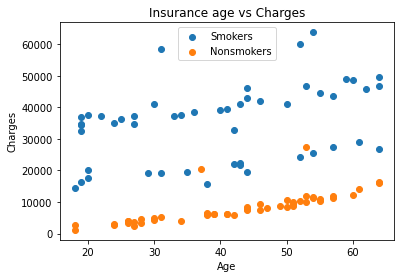

In [ ]:
# reducing the sample size 

df_smoker_reduced = df_smoker.sample(50)
df_nonsmoker_reduced = df_nonsmoker.sample(50)

plt.scatter(df_smoker_reduced.age, df_smoker_reduced.charges, label = 'Smokers')
plt.scatter(df_nonsmoker_reduced.age, df_nonsmoker_reduced.charges, label = 'Nonsmokers')
plt.title('Insurance age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

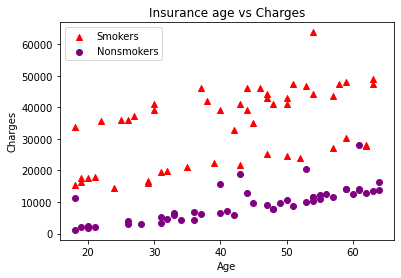

In [ ]:
# changing the marker(shape ) for each of them and the color

df_smoker_reduced = df_smoker.sample(50)
df_nonsmoker_reduced = df_nonsmoker.sample(50)

plt.scatter(df_smoker_reduced.age, df_smoker_reduced.charges, label = 'Smokers', color = 'red', marker= '^')
plt.scatter(df_nonsmoker_reduced.age, df_nonsmoker_reduced.charges, label = 'Nonsmokers', color = 'purple', marker = 'o')
plt.title('Insurance age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

LinregressResult(slope=257.7226186668954, intercept=3165.8850060630302, rvalue=0.2990081933306476, pvalue=4.886693331718841e-29, stderr=22.502389286770295, intercept_stderr=937.1494650703766)


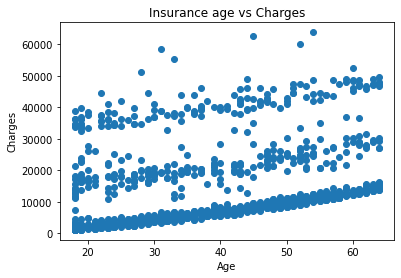

In [ ]:
# how to add a regression line into the plot, a regression line is basically a bivariate prediction
# a line of regression is a line that will minimize the sum of squared residuals between each dot and the line itself
# starte by calculating this line by giving y = +b formular
# stderr represents the spread of the dots around the line, how far off are we going in general around our predictions
from scipy import stats

print(stats.linregress(df.age, df.charges))


# y = mx + b
# y = slope(x) + intercept

plt.scatter(df.age, df.charges)
plt.title('Insurance age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

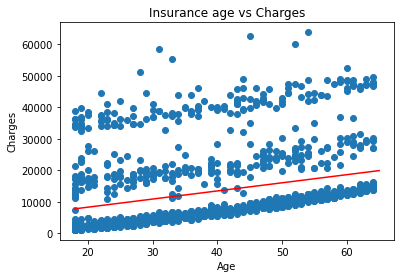

In [ ]:
# to store these in their own individual variable, lets say

m, b, r, p, err = stats.linregress(df.age, df.charges)
# use the variables one at a time to create another type of plot instead of a scatter plot
# a line plot and pass into it a set of x and y. x are the actual values

x = range(18, 66) # can use df.age.max()
y = m * x + b

#adding a color to the line
plt.plot(x, y, color = 'red')
plt.scatter(df.age, df.charges)
plt.title('Insurance age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [ ]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
# combine texts with the chart i.e stats of charts. 
# calculate the heteroscedasticity which represents the spread of dots across all values of x

from statsmodels.stats.diagnostic import het_breuschpagen
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

model = ols(formula = 'charges~age', data = df)
white_test = het_breuschpagen(model, resid, model.model.exog)

output_df = pd.DataFrame(columns =['LH stst', 'LH p', 'F stst', 'F stst p'])
output_df.loc['White'] = white_test
output_df.loc['Breuch-Pagen'] = breuschpagen_text

output_df

ImportError: ignored

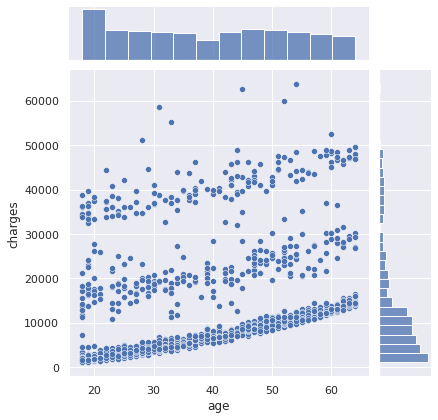

In [ ]:
import seaborn as sns

sns.set(color_codes = True)
sns.jointplot(x = 'age', y = 'charges', data=df)
plt.show()
# jointplot is a base type of plot that allows you to create a lot of variance of the same type of plot
# for instance it joins a scatter plot along with a histogram

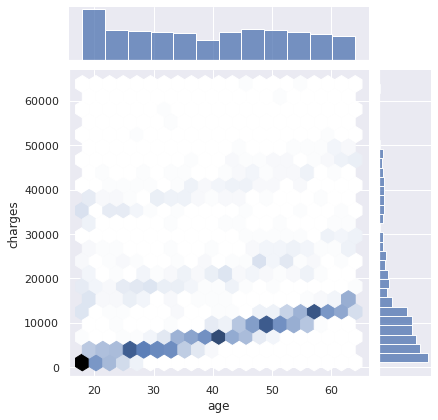

In [ ]:
# jointplot where the kind equals hex i.e it takes and creats a hexagon shape to indicate how dense each of the dotted points are

sns.jointplot(x = 'age', y = 'charges', data=df, kind = 'hex');

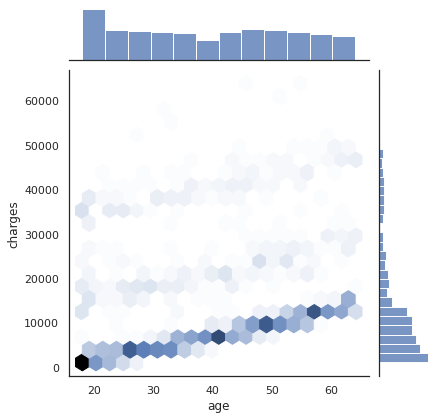

In [ ]:
# inputing a white grid and set_syle
sns.set_style('white')
sns.jointplot(x = 'age', y = 'charges', data=df, kind = 'hex')

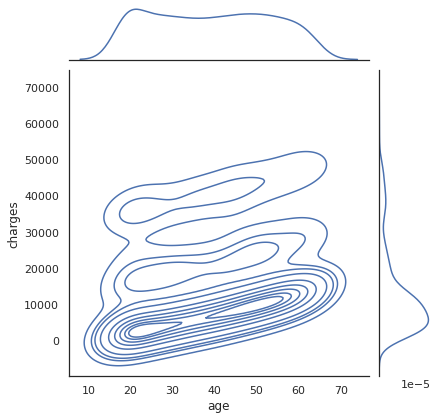

In [ ]:
sns.jointplot(x = 'age', y = 'charges', data=df, kind = 'kde');
#kde = kernal density estimation which is basically findinf a smoothed line that indicates the flow in the binned values for both plots
# it shows you more density


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'm_levels'
  cset = contour_func(


<AxesSubplot:xlabel='age', ylabel='charges'>

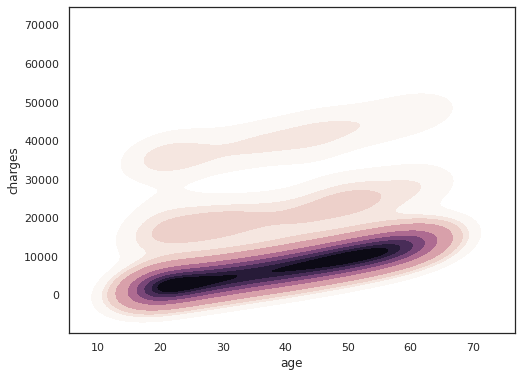

In [ ]:
# 2d kernel density plot

f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light = 1, reverse = False)
sns.kdeplot(df.age, df.charges, cmap=cmap, m_levels=60, shade=True)

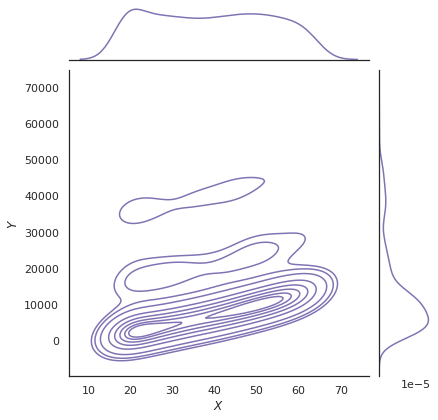

In [ ]:
g = sns.jointplot(x='age', y='charges', data=df, kind='kde', color='m')
g.plot_joint(plt.scatter, c='w',s=30, linewidth=1, marker='+')
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('$X$', '$Y$');

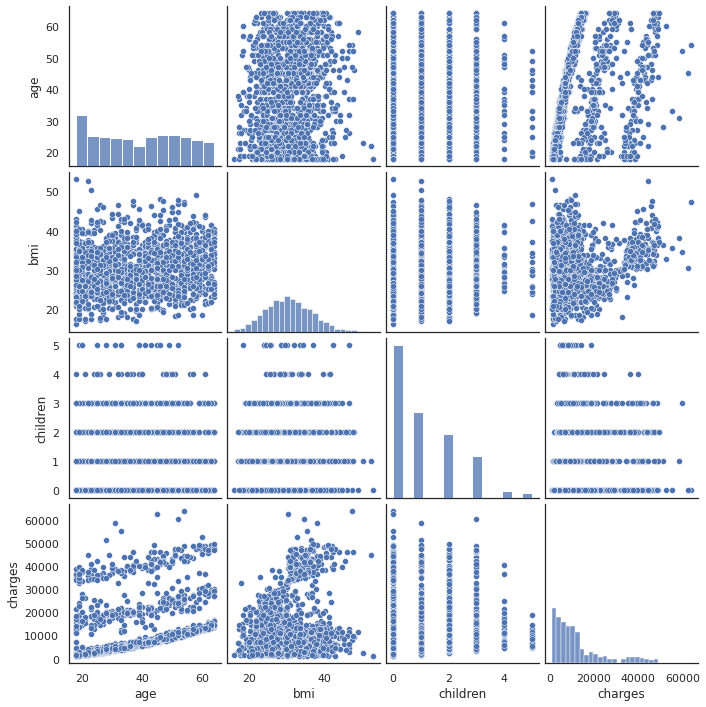

In [ ]:
df.dropna(inplace=True) # remove null values first
sns.pairplot(df);

<ipython-input-8-4ac27e30f69e>:9: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



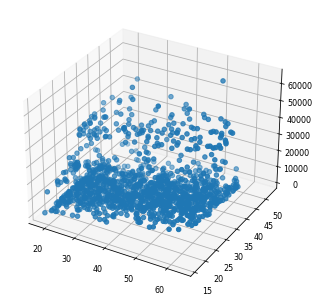

In [8]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#the two lines changes the font size of the matplotlib
font = {'size': 8}
plt.rc('font',**font )

fig = plt.figure()
three_d_plot = Axes3D(fig)
three_d_plot.scatter(df.age, df.bmi, df.charges)

plt.show()


In [4]:
import pandas as pd
import plotly.express as px

fig = px.scatter_3d(df, x='age', y='charges', z='bmi')
fig.show()